### DATA ETL

Import 3 Data sets:

 - Actual Data - Patient Enrolment by Period, by Study and by Country
 - Country - Study Attributes: 
     - Study Start Date, Stady End Date, Patient target
 - Study Attributes:
     - Therapeutic Area
     - Study Priority
     - Study Category
     - Study Phase
     - ect


Data Transformation:

1. Split Data set to 3 parts:
    - New studies (Strat Date later than Jul 2017)
    - Historical Studies (End Date earlier tahn Jul 2017)
    - On-going Studies (Start Date earlier tahn Jul 2017 and End Date later than jul 2017)
    
    *Remark: turned out, having new and on-going set combined is enough for futher modeling and exploration*
    
 
2. Generate Full time range frame for start and end studies for each data set (for historical it is done in Clusterisation notebook, *to do: move it to ETL notebook*
3. Merge Actual Data, Country and Corp
4. Calculate Compeletion rate for ongoing studies (c_rate)

In [505]:
import numpy as np

In [506]:
# The code was removed by DSX for sharing.

,Study,Country,Year,Year_Period,Month,Exercise,Measure,Amount
0,EFC11568,France Corporate,2017,Y-05,M08,Actual,Monthly Inclusion,29
1,EFC11568,France Corporate,2017,Y-05,M09,Actual,Monthly Inclusion,58
2,EFC11568,France Corporate,2017,Y-05,M10,Actual,Monthly Inclusion,35
3,EFC11568,France Corporate,2017,Y-05,M11,Actual,Monthly Inclusion,58
4,EFC11568,France Corporate,2017,Y-05,M12,Actual,Monthly Inclusion,30


In [507]:
#add 'combined' colum
df_data_pe['Combined'] = df_data_pe['Study'] + ' ' + df_data_pe['Country']


In [508]:

body = client_0c4374cc9ea94d83be07b65352226c15.get_object(Bucket='casa54c5781981c34a3b9e2c7062fa49bc6f',Key='df_study_corp.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_corp = pd.read_csv(body)
df_data_corp.head()



,Unnamed: 0,Study,Country_dim,Patient Target,Number of Centers,Number of Visits,FPI/FSI Date,LPI/LSI Date,Priority value,Project code,Study Phase,Category,Therapeutic area,Area Desc,Clinical indication,Clinical indication desc,FPI/FSI,LPI/LSI
0,13,ACC14373,Corp,8,1,5,42137,42137,Priority 1,GZ385660,I,G,TA/A,Alimentary & Metabolism,GCHD,Gaucher Disease,2015-05-13,2015-05-13
1,102,ACT12339,Corp,32,14,8,41291,41541,Priority 2,SAR100842,IIa,G,TA/M,Musculoskeletal system,SSCL,Systemic Sclerosis,2013-01-17,2013-09-24
2,185,ACT12340,Corp,60,15,22,41541,41724,Priority 1,SAR231893,IIa,G,TA/R,Respiratory system,NPy,Nasal Polyps,2013-09-24,2014-03-26
3,260,ACT12486,Corp,138,80,NaN,42756,43018,Priority 2,SAR113244,IIa,G,TA/M,Musculoskeletal system,NaN,NaN,2017-01-21,2017-10-10
4,274,ACT12688,Corp,28,18,7,41156,41716,Not Applicable,SAR339658,IIa,G,TA/N,Nervous System,UC,Ulcerative colitis,2012-09-04,2014-03-18


In [509]:
#add 'combined' colum
df_data_corp['Combined'] = df_data_corp['Study'] + ' ' + df_data_corp['Country_dim']


In [510]:

body = client_0c4374cc9ea94d83be07b65352226c15.get_object(Bucket='casa54c5781981c34a3b9e2c7062fa49bc6f',Key='df_study_country.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_country = pd.read_csv(body)
df_data_country.head()



,Unnamed: 0,Study,Country_dim,Number of Centers,Patient Target,Number of Visits,FPI/FSI,LPI/LSI,FPI/FSI Date,LPI/LSI Date
0,87,ACT11917,Russia CSU,12,31,NaN,2012-07-17,2013-03-18,41107,41351
1,88,ACT11917,Ukraine,4,17,NaN,2012-08-02,2013-03-18,41123,41351
2,112,ACT12339,France CSU,3,5,8,2013-03-13,2013-09-24,41346,41541
3,167,ACT12339,USA Corporate,14,32,8,2013-01-17,2013-09-24,41291,41541
4,176,ACT12340,Belgium,2,18,22,2013-09-24,2014-03-26,41541,41724


In [511]:
#add 'combined' colum
df_data_country['Combined'] = df_data_country['Study'] + ' ' + df_data_country['Country_dim']


In [512]:
#list with PE

pe_unique_list = df_data_pe['Combined'].unique()
corp_unique_list = df_data_corp['Combined'].unique()
country_unique_list = df_data_country['Combined'].unique()

print 'pe:', pe_unique_list.size
print 'country:', country_unique_list.size
print 'corp:', corp_unique_list.size
type(pe_unique_list)

pe: 1158
country: 1808
corp: 795


numpy.ndarray

In [513]:
#calculate number of month (periods)
df_data_country['Period_m'] = ((df_data_country['LPI/LSI Date'] - df_data_country['FPI/FSI Date']) / 30 + 1).astype(int)
print df_data_country[['Combined', 'Period_m', 'FPI/FSI','LPI/LSI']].head()

                 Combined  Period_m     FPI/FSI     LPI/LSI
0     ACT11917 Russia CSU         9  2012-07-17  2013-03-18
1        ACT11917 Ukraine         8  2012-08-02  2013-03-18
2     ACT12339 France CSU         7  2013-03-13  2013-09-24
3  ACT12339 USA Corporate         9  2013-01-17  2013-09-24
4        ACT12340 Belgium         7  2013-09-24  2014-03-26


In [514]:
#filter out historical studies
#all studies up to Aug
df_data_country_hist = df_data_country[(df_data_country['LPI/LSI Date'] <= 42940)]
print 'country file, historical:', df_data_country_hist['Combined'].count()
print df_data_country_hist.sort_values(by='LPI/LSI Date', ascending=False).head()
#country historical uniq
country_hist_unique_list = df_data_country_hist['Combined'].unique()
print 'country hist:', country_hist_unique_list.size

country file, historical: 1139
      Unnamed: 0     Study        Country_dim  Number of Centers  \
1732       31369  TDU14981  Germany Corporate                  1   
212         3894  BEQ15271      USA Corporate                  1   
914        10115  EFC13794            Hungary                  7   
1032       11099  EFC14097          China CSU                NaN   
1034       11128  EFC14097              Korea                NaN   

      Patient Target  Number of Visits     FPI/FSI     LPI/LSI  FPI/FSI Date  \
1732              24                11  2016-12-13  2017-07-18         42717   
212               76                 6  2017-07-14  2017-07-14         42930   
914              NaN                29  2016-08-29  2017-07-10         42611   
1032             NaN                12  2017-06-22  2017-06-22         42908   
1034             NaN                12  2017-06-22  2017-06-22         42908   

      LPI/LSI Date                    Combined  Period_m  
1732         42934  

In [515]:

##test
pd.date_range('2016-12-13', periods=8, freq='M',normalize=True)

DatetimeIndex(['2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31'],
              dtype='datetime64[ns]', freq='M')

In [516]:
df_main = pd.DataFrame({'Combined': '',
                   'Val': 0}, index = [0])
df_main

,Combined,Val
0,,0


In [517]:
df_data_country_hist_m = df_data_country_hist.set_index(df_data_country_hist['Combined'])
df_data_country_hist_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, ACT11917 Russia CSU to TES13519 Belgium
Data columns (total 12 columns):
Unnamed: 0           1139 non-null int64
Study                1139 non-null object
Country_dim          1139 non-null object
Number of Centers    1041 non-null float64
Patient Target       1045 non-null float64
Number of Visits     1030 non-null float64
FPI/FSI              1139 non-null object
LPI/LSI              1139 non-null object
FPI/FSI Date         1139 non-null int64
LPI/LSI Date         1139 non-null int64
Combined             1139 non-null object
Period_m             1139 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 115.7+ KB


In [518]:
df_data_country_hist_p = df_data_country_hist_m.loc[pe_unique_list].dropna()
country_unique_list_p = df_data_country_hist_p['Combined'].unique()
print df_data_country_hist_p.count()

Unnamed: 0           744
Study                744
Country_dim          744
Number of Centers    744
Patient Target       744
Number of Visits     744
FPI/FSI              744
LPI/LSI              744
FPI/FSI Date         744
LPI/LSI Date         744
Combined             744
Period_m             744
dtype: int64


In [519]:
df_data_country_hist_generated = pd.concat([pd.DataFrame({'Col':x,'Val':pd.date_range(df_data_country_hist_p['FPI/FSI'].loc[x], periods=df_data_country_hist_p['Period_m'].loc[x] + 1, freq='M',normalize=True), 'period_m':df_data_country_hist_p['Period_m'].loc[x]}) for x in country_unique_list_p],
           ignore_index=True)

In [520]:
print df_data_country_hist_generated.count()
print df_data_country_hist_generated.info()
#add period index
df_data_country_hist_generated['Year_n'] = pd.DatetimeIndex(df_data_country_hist_generated['Val']).year
df_data_country_hist_generated['Month_n'] = pd.DatetimeIndex(df_data_country_hist_generated['Val']).month
df_data_country_hist_generated['Combined'] = df_data_country_hist_generated['Col']
#add year
#add month
print df_data_country_hist_generated.head()


Col         12878
Val         12878
period_m    12878
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12878 entries, 0 to 12877
Data columns (total 3 columns):
Col         12878 non-null object
Val         12878 non-null datetime64[ns]
period_m    12878 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 402.4+ KB
None
                         Col        Val  period_m  Year_n  Month_n  \
0  EFC11568 France Corporate 2012-07-31         8    2012        7   
1  EFC11568 France Corporate 2012-08-31         8    2012        8   
2  EFC11568 France Corporate 2012-09-30         8    2012        9   
3  EFC11568 France Corporate 2012-10-31         8    2012       10   
4  EFC11568 France Corporate 2012-11-30         8    2012       11   

                    Combined  
0  EFC11568 France Corporate  
1  EFC11568 France Corporate  
2  EFC11568 France Corporate  
3  EFC11568 France Corporate  
4  EFC11568 France Corporate  


In [521]:
###patien enrolment file


In [522]:
current_dict = {'Y-13': '2004','Y-12': '2005','Y-11': '2006','Y-10': '2007','Y-09': '2008','Y-08': '2009','Y-07': '2010', 'Y-06': '2011', 'Y-05': '2012','Y-04': '2013', 'Y-03': '2014', 'Y-02': '2015','Y-01': '2016','Y01': '2017','Y02': '2018','Y03': '2019','Y04': '2020','Y05': '2021','Y06': '2022','Y07': '2023','Y08': '2024','Y09': '2025','Y10': '2026','Y11': '2027','Y12': '2028','Y13': '2029','Y14': '2030','Y15': '2031'}

In [523]:
df_data_pe['Year_Period'].replace(current_dict, inplace=True)
df_data_pe['Month_n'] = df_data_pe['Month'].apply(lambda x:x[1:]).astype(int)

In [524]:
df_data_pe['Year_n'] = df_data_pe['Year_Period'].astype(int)

In [525]:
#merge
df_data_patient_hist_merged = pd.merge(df_data_pe, df_data_country_hist_generated, on=['Combined','Year_n','Month_n'], how='right')
df_data_patient_hist_merged['Combined'].unique().size

744

In [560]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline 

In [557]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

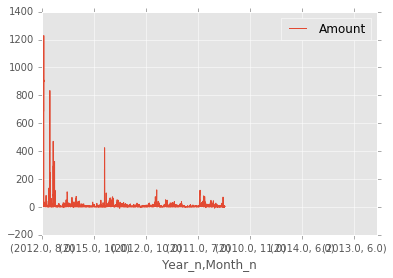

In [562]:
df_data_patient_hist_merged.plot(y="Amount", x=["Year_n", "Month_n"], kind='line')

In [621]:
df_data_patient_hist_merged.groupby(['Combined','Val'])['Amount'].sum()

df_data_patient_hist_merged.sort_values(by=['Amount'], ascending=False).head()
#df_data_patient_hist_merged.pivot(index='Val', columns='Combined', values='Amount').plot()
#df_plot_pivot.head()

#df_data_patient_hist_merged.where(df_data_patient_hist_merged['Country'] == 'USA CSU').dropna().head()
#plt.sh

,Study,Country,Year,Year_Period,Month,Exercise,Measure,Amount,Combined,Month_n,Year_n,Col,Val,period_m
51,EFC11570,France Corporate,2017,2015,M09,Actual,Monthly Inclusion,1228,EFC11570 France Corporate,9,2015,EFC11570 France Corporate,2015-09-30,53
52,EFC11570,France Corporate,2017,2015,M10,Actual,Monthly Inclusion,1007,EFC11570 France Corporate,10,2015,EFC11570 France Corporate,2015-10-31,53
49,EFC11570,France Corporate,2017,2015,M07,Actual,Monthly Inclusion,910,EFC11570 France Corporate,7,2015,EFC11570 France Corporate,2015-07-31,53
48,EFC11570,France Corporate,2017,2015,M06,Actual,Monthly Inclusion,910,EFC11570 France Corporate,6,2015,EFC11570 France Corporate,2015-06-30,53
50,EFC11570,France Corporate,2017,2015,M08,Actual,Monthly Inclusion,896,EFC11570 France Corporate,8,2015,EFC11570 France Corporate,2015-08-31,53


In [645]:
df_data_patient_hist_merged['Period Index'] = df_data_patient_hist_merged.sort_values(by=['Combined', 'Val']).groupby('Combined').cumcount() + 1

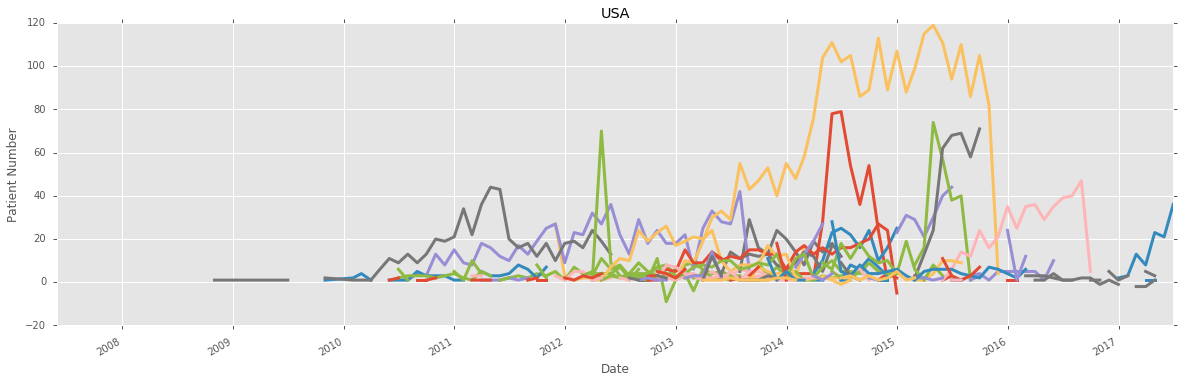

In [634]:

#plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
fig, ax = plt.subplots()
#plt.plot(df_plot_pivot.index, df_plot_pivot, kind='line', ax=ax)

df_data_patient_hist_merged.where(df_data_patient_hist_merged['Country'] == 'USA CSU').dropna().pivot(index='Val', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)
ax.legend().set_visible(False)

ax.set_title('USA')
#ax.set_xlim([0, 50])
ax.set_xlabel('Date')
ax.set_ylabel('Patient Number');



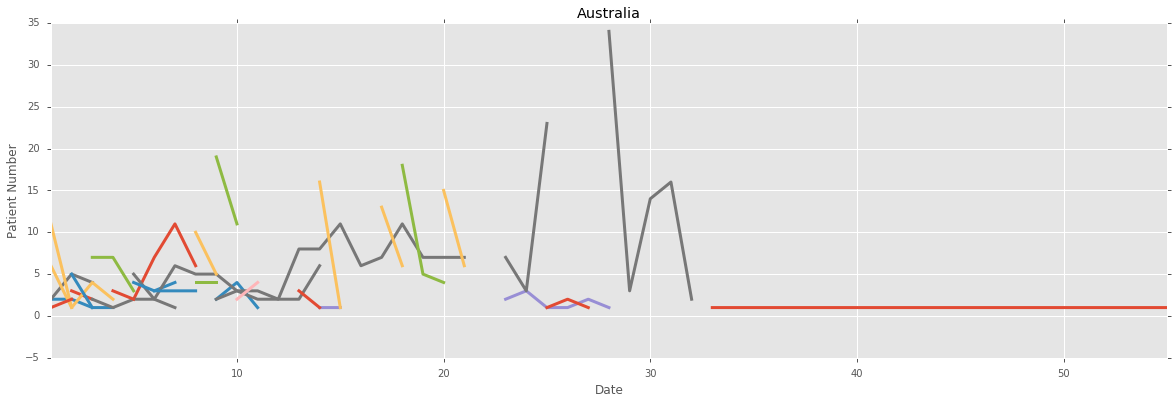

In [646]:
#plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
fig, ax = plt.subplots()
#plt.plot(df_plot_pivot.index, df_plot_pivot, kind='line', ax=ax)

df_data_patient_hist_merged.where(df_data_patient_hist_merged['Country'] == 'Australia').dropna().sort_values(by=['Combined', 'Val']).pivot(index='Period Index', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)
ax.legend().set_visible(False)

#ax.set_xlim([0, 50])
ax.set_title('Australia')
ax.set_xlabel('Date')
ax.set_ylabel('Patient Number')


In [526]:
df_data_patient_hist_merged.head()

,Study,Country,Year,Year_Period,Month,Exercise,Measure,Amount,Combined,Month_n,Year_n,Col,Val,period_m
0,EFC11568,France Corporate,2017,2012,M08,Actual,Monthly Inclusion,29,EFC11568 France Corporate,8,2012,EFC11568 France Corporate,2012-08-31,8
1,EFC11568,France Corporate,2017,2012,M09,Actual,Monthly Inclusion,58,EFC11568 France Corporate,9,2012,EFC11568 France Corporate,2012-09-30,8
2,EFC11568,France Corporate,2017,2012,M10,Actual,Monthly Inclusion,35,EFC11568 France Corporate,10,2012,EFC11568 France Corporate,2012-10-31,8
3,EFC11568,France Corporate,2017,2012,M11,Actual,Monthly Inclusion,58,EFC11568 France Corporate,11,2012,EFC11568 France Corporate,2012-11-30,8
4,EFC11568,France Corporate,2017,2012,M12,Actual,Monthly Inclusion,30,EFC11568 France Corporate,12,2012,EFC11568 France Corporate,2012-12-31,8


In [527]:
# The code was removed by DSX for sharing.

In [528]:
from ibm_botocore.client import Config
import ibm_boto3
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

In [529]:
from ibm_botocore.client import Config
import ibm_boto3
def upload_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.upload_file(Filename=local_file_name, Bucket=credentials['BUCKET'],Key=key)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Uploaded')

In [530]:
df_data_patient_hist_merged.to_csv('CASA_PE_historical.csv',index=True)
upload_file_cos(credentials,'CASA_PE_historical.csv','CASA_PE_historical.csv')

File Uploaded


In [531]:
#filter out new studies
#all studies up to Aug
df_data_country_new = df_data_country[(df_data_country['FPI/FSI Date'] > 42940)]
print 'country file, new:', df_data_country_new['Combined'].count()
print df_data_country_new.sort_values(by='LPI/LSI Date', ascending=False).head()
#country historical uniq
df_data_country_new_list = df_data_country_new['Combined'].unique()
print 'country new:', df_data_country_new_list.size

country file, new: 316
      Unnamed: 0     Study       Country_dim  Number of Centers  \
1581       25238  OBS15155  France Corporate                  1   
887         9774  EFC13738  France Corporate                 25   
1414       20655  LTS13932  France Corporate                 13   
1033       11100  EFC14097   China Corporate                NaN   
341         5349  DRI13926  France Corporate                 43   

      Patient Target  Number of Visits     FPI/FSI     LPI/LSI  FPI/FSI Date  \
1581             300               NaN  2017-11-09  2025-11-07         43048   
887               60                11  2017-12-16  2021-03-11         43085   
1414              99                25  2017-07-25  2020-07-03         42941   
1033             NaN                12  2018-05-28  2020-01-20         43248   
341               72                26  2017-11-08  2020-01-16         43047   

      LPI/LSI Date                   Combined  Period_m  
1581         45968  OBS15155 France

In [532]:
df_data_country_new.head()

,Unnamed: 0,Study,Country_dim,Number of Centers,Patient Target,Number of Visits,FPI/FSI,LPI/LSI,FPI/FSI Date,LPI/LSI Date,Combined,Period_m
31,868,ACT14132,France CSU,2,3,25,2017-08-16,2019-02-19,42963,43515,ACT14132 France CSU,19
32,871,ACT14132,Germany CSU,1,4,25,2017-08-16,2019-02-19,42963,43515,ACT14132 Germany CSU,19
33,882,ACT14132,Japan,3,2,25,2017-08-16,2019-02-19,42963,43515,ACT14132 Japan,19
34,915,ACT14132,Taiwan,1,4,25,2017-08-16,2019-02-19,42963,43515,ACT14132 Taiwan,19
35,921,ACT14132,UK CSU,2,4,25,2017-08-16,2019-02-19,42963,43515,ACT14132 UK CSU,19


In [533]:
df_data_country_new.to_csv('CASA_PE_New.csv',index=True)
upload_file_cos(credentials,'CASA_PE_New.csv','CASA_PE_New.csv')

File Uploaded


In [534]:
#filter out on-going studies
#all studies up to Aug
df_data_country_ongoing = df_data_country[(df_data_country['FPI/FSI Date'] <= 42940) & (df_data_country['LPI/LSI Date'] > 42940)]
print 'country file, new:', df_data_country_ongoing['Combined'].count()
print df_data_country_ongoing.sort_values(by='LPI/LSI Date', ascending=False).head()
#country historical uniq
df_data_country_ongoing_list = df_data_country_ongoing['Combined'].unique()
print 'country ongoing:', df_data_country_ongoing_list.size

country file, new: 353
      Unnamed: 0     Study       Country_dim  Number of Centers  \
1485       21725  MSC12868           USA CSU                  1   
1486       21726  MSC12868     USA Corporate                  2   
1420       20791  LTS13972           USA CSU                  5   
1672       28837  TCD14678  France Corporate                 35   
1493       22098  OBS12751  France Corporate                 17   

      Patient Target  Number of Visits     FPI/FSI     LPI/LSI  FPI/FSI Date  \
1485               4                26  2006-05-28  2022-12-01         38865   
1486              20                26  2006-05-28  2022-12-01         38865   
1420               5                 2  2012-03-06  2021-02-23         40974   
1672             166                16  2017-06-24  2020-06-11         42910   
1493             196                 4  2015-11-25  2020-02-28         42333   

      LPI/LSI Date                   Combined  Period_m  
1485         44896           MSC128

In [535]:
df_data_country_ongoing['c_rate'] = 1

/usr/local/src/bluemix_jupyter_bundle.v83/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [536]:
df_data_country_ongoing['Complete_rate'] = (- df_data_country_ongoing['FPI/FSI Date'] + df_data_country_ongoing['LPI/LSI Date'])/(42940 - df_data_country_ongoing['FPI/FSI Date'])

/usr/local/src/bluemix_jupyter_bundle.v83/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [537]:
df_data_country_ongoing_m = df_data_country_ongoing.set_index(df_data_country_ongoing['Combined'])
#df_data_country_ongoing_m.info()

In [538]:
#calculate study completein rate
df_data_country_ongoing_m['c_rate'] = (42940 - df_data_country_ongoing_m['FPI/FSI Date'])/(df_data_country_ongoing_m['LPI/LSI Date'] - df_data_country_ongoing_m['FPI/FSI Date'] ).astype(float)


In [539]:
df_data_country_ongoing_m.head()

,Unnamed: 0,Study,Country_dim,Number of Centers,Patient Target,Number of Visits,FPI/FSI,LPI/LSI,FPI/FSI Date,LPI/LSI Date,Combined,Period_m,c_rate,Complete_rate
Combined,,,,,,,,,,,,,,
ACT14019 USA Corporate,838,ACT14019,USA Corporate,NaN,NaN,11,2017-04-03,2017-10-23,42828,43031,ACT14019 USA Corporate,7,0.551724,1.812500
ACT14596 Finland,1038,ACT14596,Finland,2,2,13,2017-03-14,2019-07-18,42808,43664,ACT14596 Finland,29,0.154206,6.484848
ACT14596 France CSU,1039,ACT14596,France CSU,4,8,13,2017-04-11,2019-07-18,42836,43664,ACT14596 France CSU,28,0.125604,7.961538
ACT14596 France Corporate,1040,ACT14596,France Corporate,22,39,13,2017-03-14,2019-07-18,42808,43664,ACT14596 France Corporate,29,0.154206,6.484848
ACT14596 Italy CSU,1052,ACT14596,Italy CSU,4,8,13,2017-04-10,2019-07-18,42835,43664,ACT14596 Italy CSU,28,0.126659,7.895238


In [540]:
df_data_country_ongoing_p = df_data_country_ongoing_m.loc[pe_unique_list].dropna()
country_ongoing_unique_list_p = df_data_country_ongoing_p['Combined'].unique()
print df_data_country_ongoing_p.count()

Unnamed: 0           234
Study                234
Country_dim          234
Number of Centers    234
Patient Target       234
Number of Visits     234
FPI/FSI              234
LPI/LSI              234
FPI/FSI Date         234
LPI/LSI Date         234
Combined             234
Period_m             234
c_rate               234
Complete_rate        234
dtype: int64


In [541]:
df_data_country_ongoing_generated = pd.concat([pd.DataFrame({ 'Col':x,'Val':pd.date_range(df_data_country_ongoing_p['FPI/FSI'].loc[x], periods=df_data_country_ongoing_p['Period_m'].loc[x] + 1, freq='M',normalize=True), 'period_m':df_data_country_ongoing_p['Period_m'].loc[x], 'patient_target': df_data_country_ongoing_p['Patient Target'].loc[x]}) for x in country_ongoing_unique_list_p],
           ignore_index=True)

In [542]:
print df_data_country_ongoing_generated.count()
print df_data_country_ongoing_generated.info()
#add period index
df_data_country_ongoing_generated['Year_n'] = pd.DatetimeIndex(df_data_country_ongoing_generated['Val']).year
df_data_country_ongoing_generated['Month_n'] = pd.DatetimeIndex(df_data_country_ongoing_generated['Val']).month
df_data_country_ongoing_generated['Combined'] = df_data_country_ongoing_generated['Col']
#add year
#add month
print df_data_country_ongoing_generated.head(50)


Col               5520
Val               5520
patient_target    5520
period_m          5520
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5520 entries, 0 to 5519
Data columns (total 4 columns):
Col               5520 non-null object
Val               5520 non-null datetime64[ns]
patient_target    5520 non-null float64
period_m          5520 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 215.6+ KB
None
                          Col        Val  patient_target  period_m  Year_n  \
0          EFC13889 India CSU 2016-08-31             102        15    2016   
1          EFC13889 India CSU 2016-09-30             102        15    2016   
2          EFC13889 India CSU 2016-10-31             102        15    2016   
3          EFC13889 India CSU 2016-11-30             102        15    2016   
4          EFC13889 India CSU 2016-12-31             102        15    2016   
5          EFC13889 India CSU 2017-01-31             102        15    2017   

In [543]:
#merge
df_data_country_ongoing_merged = pd.merge(df_data_pe, df_data_country_ongoing_generated, on=['Combined','Year_n','Month_n'], how='right')
df_data_country_ongoing_merged['Combined'].unique().size

234

In [544]:
df_data_country_ongoing_merged.head(30)

,Study,Country,Year,Year_Period,Month,Exercise,Measure,Amount,Combined,Month_n,Year_n,Col,Val,patient_target,period_m
0,EFC13889,India CSU,2017,2016,M08,Actual,Monthly Inclusion,2,EFC13889 India CSU,8,2016,EFC13889 India CSU,2016-08-31,102,15
1,EFC13889,India CSU,2017,2016,M09,Actual,Monthly Inclusion,3,EFC13889 India CSU,9,2016,EFC13889 India CSU,2016-09-30,102,15
2,EFC13889,India CSU,2017,2016,M10,Actual,Monthly Inclusion,8,EFC13889 India CSU,10,2016,EFC13889 India CSU,2016-10-31,102,15
3,EFC13889,India CSU,2017,2016,M11,Actual,Monthly Inclusion,3,EFC13889 India CSU,11,2016,EFC13889 India CSU,2016-11-30,102,15
4,EFC13889,India CSU,2017,2016,M12,Actual,Monthly Inclusion,9,EFC13889 India CSU,12,2016,EFC13889 India CSU,2016-12-31,102,15
5,EFC13889,India CSU,2017,2017,M01,Actual,Monthly Inclusion,11,EFC13889 India CSU,1,2017,EFC13889 India CSU,2017-01-31,102,15
6,EFC13889,India CSU,2017,2017,M02,Actual,Monthly Inclusion,9,EFC13889 India CSU,2,2017,EFC13889 India CSU,2017-02-28,102,15
7,EFC13889,India CSU,2017,2017,M03,Actual,Monthly Inclusion,6,EFC13889 India CSU,3,2017,EFC13889 India CSU,2017-03-31,102,15
8,EFC13889,India CSU,2017,2017,M04,Actual,Monthly Inclusion,8,EFC13889 India CSU,4,2017,EFC13889 India CSU,2017-04-30,102,15
9,EFC13889,India CSU,2017,2017,M05,Actual,Monthly Inclusion,10,EFC13889 India CSU,5,2017,EFC13889 India CSU,2017-05-31,102,15


In [545]:
df_data_country_ongoing_merged_t= df_data_country_ongoing_merged

In [546]:
df_data_country_ongoing_merged_t.sort_values(['Combined', 'Val' ],ascending=True, inplace=True)

In [547]:
df_data_country_ongoing_merged_t['Period Index'] = df_data_country_ongoing_merged_t.groupby('Combined').cumcount() + 1
df_data_country_ongoing_merged_t['Amount max'] = df_data_country_ongoing_merged_t['patient_target']
#df_data_country_ongoing_merged_t.head()

In [548]:
def get_10(row):
    
    if float(row['Period Index']) / float(row['period_m']) <= 0.25:
        return 1
    elif  float(row['Period Index']) / float(row['period_m']) <= 0.5:
        return 2
    elif  float(row['Period Index']) / float(row['period_m']) <= 0.75:
        return 3
    else:
        return 4

df_data_country_ongoing_merged_t['get_10'] = df_data_country_ongoing_merged_t.apply(get_10, axis=1)

def get_per(row):
    return float(row['Amount']) / float(row['Amount max'])


def get_per_cumsum(row):
    if row['get_10']/4 <= df_data_country_ongoing_m['c_rate'].loc[row['Combined']]:
        return df_data_country_ongoing_merged_t.groupby('Combined')['get_per'].cumsum()
    else:
        return 0

df_data_country_ongoing_merged_t['get_per'] = df_data_country_ongoing_merged_t.apply(get_per, axis=1)
df_data_country_ongoing_merged_t['cumsum_get_per'] = df_data_country_ongoing_merged_t.groupby('Combined')['get_per'].cumsum()
#df_data_country_ongoing_merged_t['cumsum_get_per'] = df_data_country_ongoing_merged_t.apply(get_per_cumsum, axis=1)

In [549]:
df_data_country_ongoing_merged_t[['Combined','get_10','Period Index', 'period_m', 'Val', 'Amount', 'Amount max', 'get_per', 'cumsum_get_per']].head()

,Combined,get_10,Period Index,period_m,Val,Amount,Amount max,get_per,cumsum_get_per
4362,ACT14596 Finland,1,1,29,2017-03-31,NaN,2,NaN,NaN
1083,ACT14596 Finland,1,2,29,2017-04-30,1,2,0.5,0.5
4363,ACT14596 Finland,1,3,29,2017-05-31,NaN,2,NaN,NaN
4364,ACT14596 Finland,1,4,29,2017-06-30,NaN,2,NaN,NaN
4365,ACT14596 Finland,1,5,29,2017-07-31,NaN,2,NaN,NaN


In [550]:
df_pivot_data_country_ongoing_merged_t = pd.pivot_table(df_data_country_ongoing_merged_t.dropna(), values=['get_per'], index=['get_10'], columns=['Combined'], aggfunc=np.sum)
df_pivot_data_country_ongoing_merged_t.fillna(value = 0, inplace = True)
df_pivot_data_country_ongoing_merged_t= df_pivot_data_country_ongoing_merged_t.cumsum()
#print df_pivot.head()
df_pivot_data_country_ongoing_merged_t.columns.droplevel(level=0)

Index([u'ACT14596 Finland', u'ACT14596 France CSU', u'ACT14596 Italy CSU',
       u'ACT14596 Russia CSU', u'ACT14604 Estonia', u'ACT14604 Germany CSU',
       u'ACT14604 Italy CSU', u'ACT14604 Mexico', u'ACT14604 Poland',
       u'ACT14604 Romania',
       ...
       u'TED13751 Canada', u'TED13751 France CSU',
       u'TED13751 France Corporate', u'TED13751 Korea', u'TED13751 Spain',
       u'TED14095 Japan', u'TED14147 Denmark', u'TED14147 France CSU',
       u'TED14147 Spain', u'TED14154 USA CSU'],
      dtype='object', name=u'Combined', length=234)

In [551]:
df_pivot = df_pivot_data_country_ongoing_merged_t.T
df_pivot.index = df_pivot.index.droplevel(level=0)
df_pivot.head()

get_10,1,2,3,4
Combined,,,,
ACT14596 Finland,0.500000,0.500000,0.500000,0.500000
ACT14596 France CSU,0.750000,0.750000,0.750000,0.750000
ACT14596 Italy CSU,0.125000,0.125000,0.125000,0.125000
ACT14596 Russia CSU,0.285714,0.285714,0.285714,0.285714
ACT14604 Estonia,0.500000,0.750000,0.750000,0.750000


In [552]:
df_pivot['c_rate'] = df_data_country_ongoing_m['c_rate'].loc[df_pivot.index]

In [553]:
def c_rate_check_1(row):
    if row['c_rate'] <= 0.25:
        return 0
    else:
        return row[1]
def c_rate_check_2(row):
    if row['c_rate'] <= 0.5:
        return 0
    else:
        return row[2]
def c_rate_check_3(row):
    if row['c_rate'] <= 0.75:
        return 0
    else:
        return row[3]
def c_rate_check_4(row):
    if row['c_rate'] < 1:
        return 0
    else:
        return row[4]
df_pivot[1] = df_pivot.apply(c_rate_check_1, axis=1)
df_pivot[2] = df_pivot.apply(c_rate_check_2, axis=1)
df_pivot[3] = df_pivot.apply(c_rate_check_3, axis=1)
#always zero
df_pivot[4] = 0

In [554]:
type(df_pivot)

pandas.core.frame.DataFrame

In [555]:
df_pivot.to_csv('CASA_combo_ongoing.csv',index=True)
upload_file_cos(credentials,'CASA_combo_ongoing.csv','CASA_combo_ongoing.csv')

File Uploaded
